In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
link_to_data = 'Fraud/creditcard.csv'
data = pd.read_csv(link_to_data)

<h1> Data Wrangling and Analysis </h1>

In [3]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import RobustScaler

time = data.Time.values
amount = data.Amount.values

robo = RobustScaler()
data['Scaled Time'] = robo.fit_transform(time.reshape(-1,1))
data['Scaled Amount'] = robo.fit_transform(amount.reshape(-1,1))

data.drop(['Time','Amount'],axis=1,inplace=True)


In [4]:
sss = StratifiedShuffleSplit(10,random_state=1995)

X = data.drop(['Class'],axis=1,inplace=False)
Y = data.Class

for train_idx, test_idx in sss.split(X,Y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = Y.iloc[train_idx], Y.iloc[test_idx]

In [5]:
fraud_data = data.loc[data.Class == 1]


<h2> Undersampling </h2>

In [6]:
len(fraud_data)

492

In [7]:
non_fraud_data = data.loc[data.Class == 0][:492]

In [8]:
new_df = pd.concat([fraud_data,non_fraud_data])

In [9]:
sampled_df = new_df.sample(frac=1)

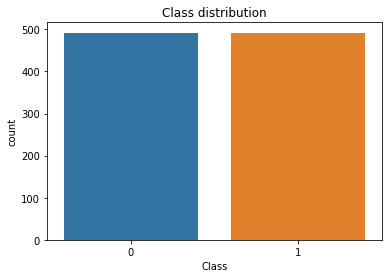

In [10]:
sns.countplot('Class',data=sampled_df)
plt.title("Class distribution")
plt.show()

In [11]:
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Scaled Time,Scaled Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-0.994983,1.783274
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.994983,-0.269825
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-0.994972,4.983721
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-0.994972,1.418291
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.994960,0.670579
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,0,-0.994960,-0.256131
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,0,-0.994937,-0.237686
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0,-0.994901,0.262698
8,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0,-0.994901,0.994900
9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,0,-0.994878,-0.255991


In [12]:
%matplotlib inline

Text(0.5,1,'Correlation matrix - balanced')

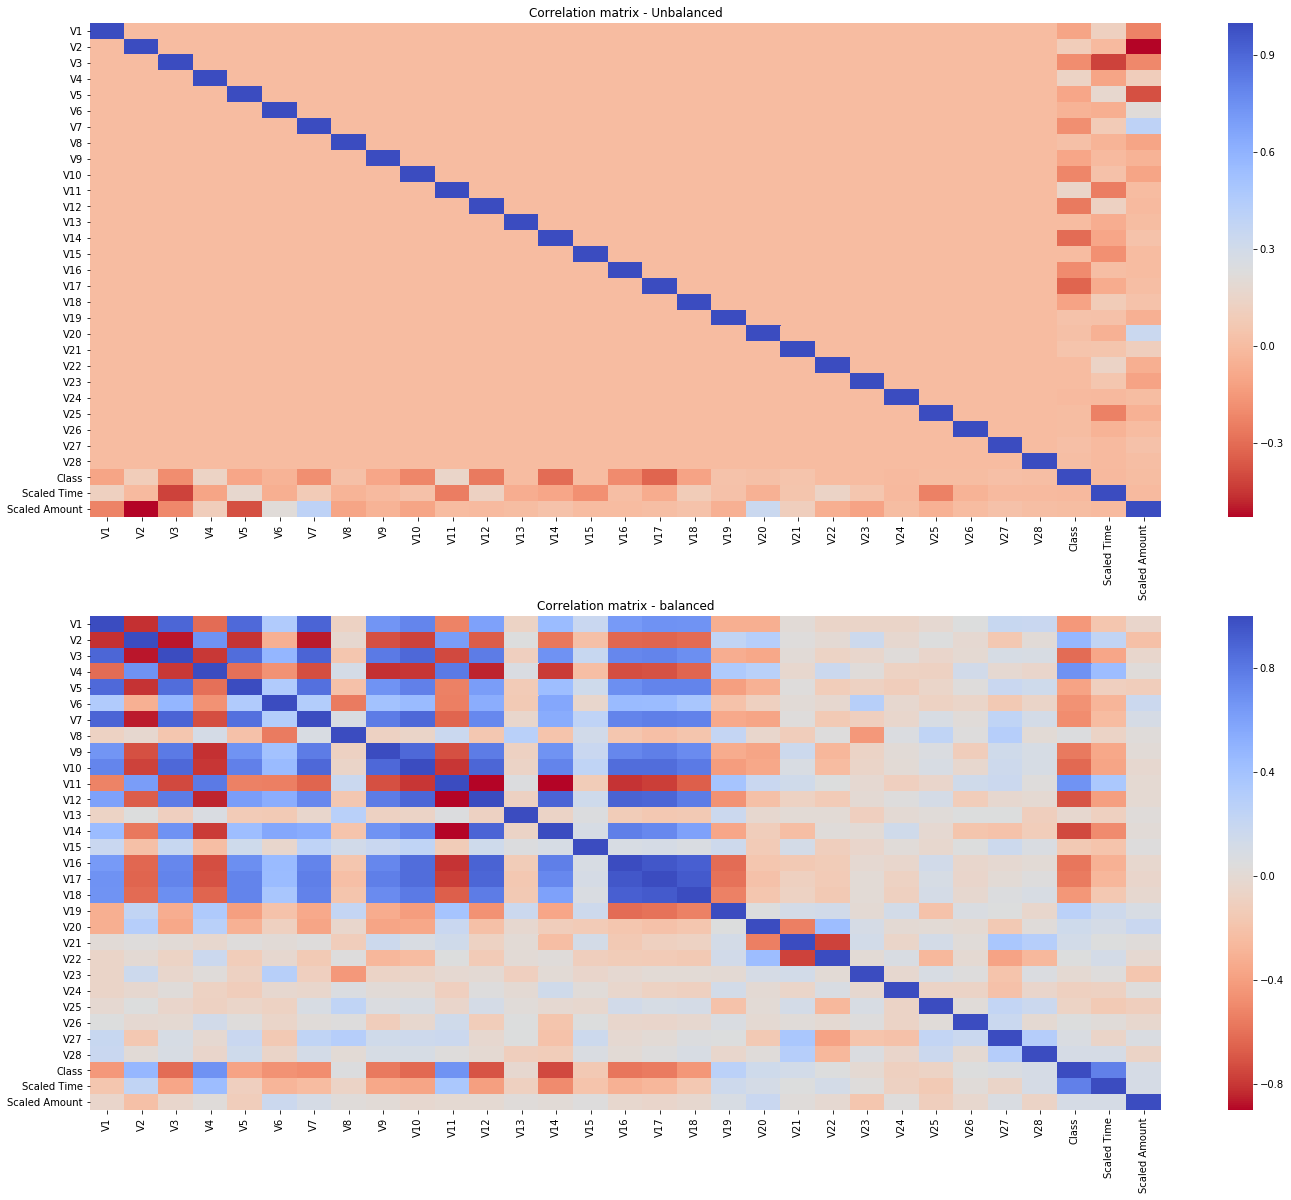

In [13]:
og_corr = data.corr()
fig,ax = plt.subplots(2,1,figsize=(24,20))
sns.heatmap(data.corr(),cmap='coolwarm_r',ax=ax[0])
ax[0].set_title('Correlation matrix - Unbalanced')

sns.heatmap(sampled_df.corr(),cmap='coolwarm_r',ax=ax[1])
ax[1].set_title('Correlation matrix - balanced')


<h2> Outlier Detection and Removal </h2>

In [14]:
positive_corr = ['V2','V4','V11','V19']
negative_corr = ['V1','V3','V5','V6','V7','V9','V10','V12','V14','V16','V17','V18']

In [15]:
def box_plot(vars,data):
    fig, ax = plt.subplots(1,len(vars),figsize=(20,4))
    fig.tight_layout(pad=3)
    for i in range(len(vars)):
     sns.boxplot(x='Class',y=vars[i],data=data,palette='coolwarm_r',ax=ax[i])
     ax[i].set_title(f"{vars[i]} boxplot for different classes")
     

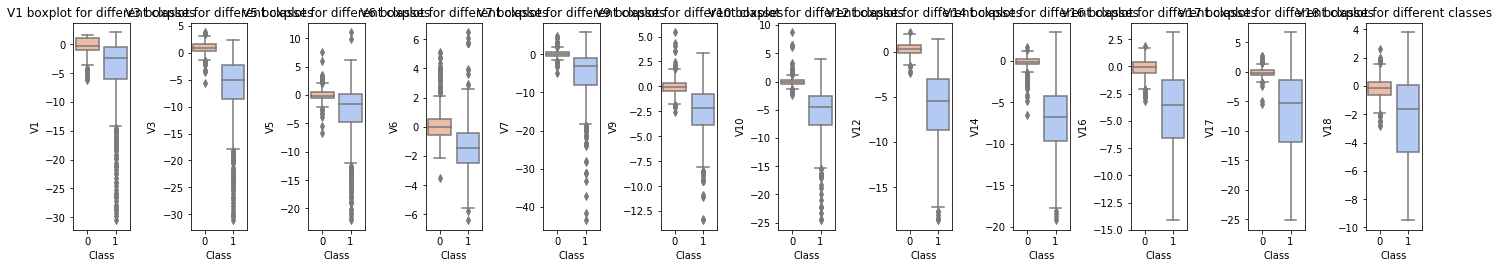

In [16]:
box_plot(negative_corr,sampled_df)

In [17]:
def dist_plot(vars,data):
    fig, ax = plt.subplots(nrows=len(vars),figsize=(10,20))
    fig.tight_layout(pad=3)
    for i in range(len(vars)):
     sns.distplot(data[vars[i]].loc[sampled_df.Class==1],ax=ax[i])
     ax[i].set_title(f"{vars[i]} distribution plot")

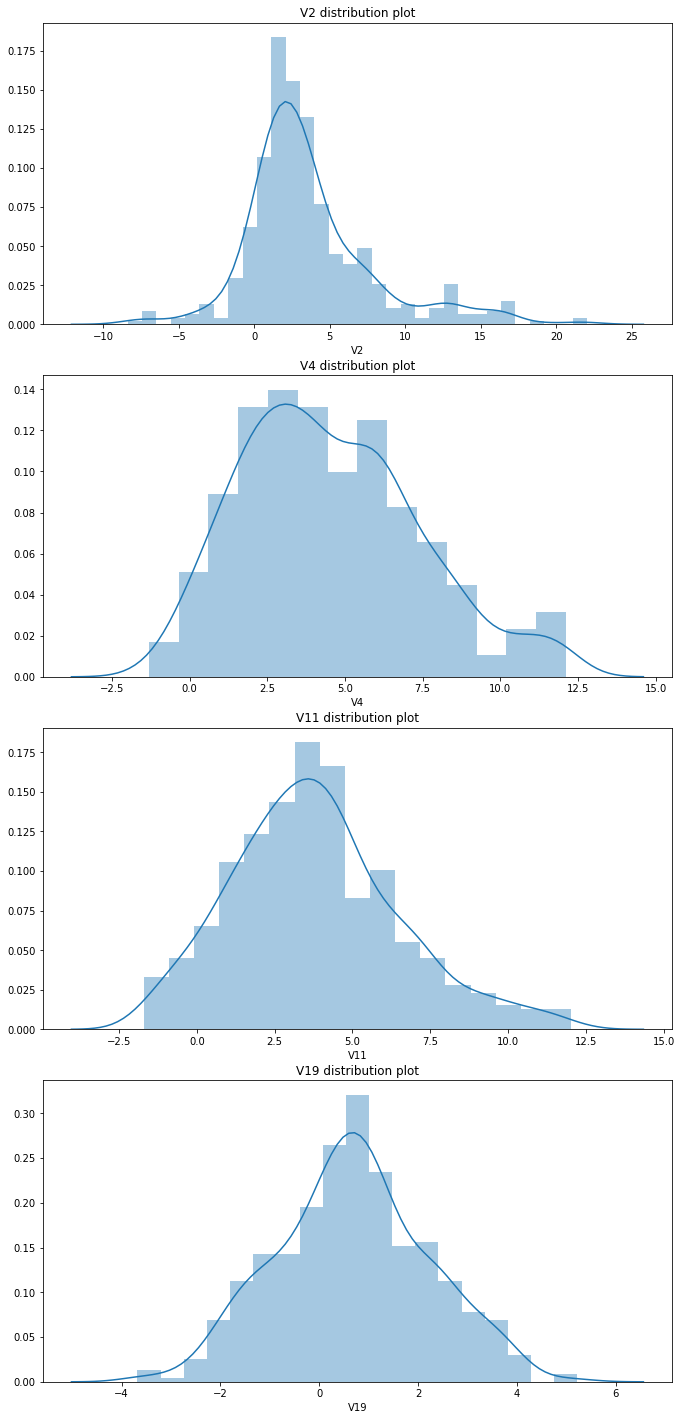

In [18]:
dist_plot(positive_corr,sampled_df)

In [19]:
Q1 = sampled_df.quantile(0.25)
Q3 = sampled_df.quantile(0.75)

In [20]:
IQR = Q3-Q1
print(IQR)

V1               3.658436
V2               2.641600
V3               6.019247
V4               3.829381
V5               2.119670
V6               1.675820
V7               3.365486
V8               0.979180
V9               2.336397
V10              4.571882
V11              3.774368
V12              5.821975
V13              1.439279
V14              6.680920
V15              1.296531
V16              3.732605
V17              5.505365
V18              2.044185
V19              1.490456
V20              0.580923
V21              0.887431
V22              0.974260
V23              0.369343
V24              0.808471
V25              0.672897
V26              0.605428
V27              0.494341
V28              0.267889
Class            1.000000
Scaled Time      0.885763
Scaled Amount    1.277824
dtype: float64


In [21]:
print((sampled_df<(Q1-1.5*IQR)) | (sampled_df>(Q3+1.5*IQR)) )

V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  \
240222  False  False  False  False  False  False  False  False  False  False   
63      False  False  False  False  False   True  False  False  False  False   
153885  False  False  False  False  False  False  False   True  False  False   
151011   True   True   True  False   True  False   True   True   True   True   
39      False  False  False  False  False  False  False  False  False  False   
154694  False  False  False  False  False  False  False  False  False  False   
18809   False  False  False  False  False  False  False  False  False  False   
58422   False  False  False  False  False  False  False  False  False  False   
114271  False  False  False  False  False  False  False  False  False  False   
148     False  False  False  False  False  False  False  False  False  False   
143188  False  False  False  False  False  False  False   True  False  False   
415     False  False  False  False  False  False  F

In [22]:
outlier_removed = sampled_df[~((sampled_df<(Q1-1.5*IQR)) | (sampled_df>(Q3+1.5*IQR)) ).any(axis=1)]

In [23]:
outlier_removed

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Scaled Time,Scaled Amount
240222,1.852889,1.069593,-1.776101,4.617410,0.770413,-0.400859,-0.040970,0.089510,-0.217705,-0.373927,...,-0.176244,0.027437,-0.468006,0.058063,0.148263,0.042278,0.040573,1,0.773059,-0.293440
39,1.110880,0.168717,0.517144,1.325407,-0.191573,0.019504,-0.031849,0.117620,0.017665,0.044865,...,0.095701,-0.048198,0.232115,0.606201,-0.342097,0.036770,0.007480,0,-0.994643,-0.216027
114271,-2.869795,1.335667,-1.009530,1.693885,-0.741480,-0.796773,-2.614242,1.066636,-1.135497,-3.943337,...,0.228027,-0.749298,-0.067179,0.215792,-0.453651,0.349191,0.198862,1,-0.132567,-0.077133
148,-0.238411,0.509263,1.952001,0.779066,-0.378940,0.251137,-0.072412,0.228755,0.210900,-0.373814,...,0.903777,-0.121349,0.141225,-0.613854,0.575920,0.193592,0.165132,0,-0.993903,-0.265633
415,0.007043,1.239504,0.417050,0.530004,0.942324,-0.559968,1.502981,-0.751563,0.012713,1.619208,...,0.720870,-0.141873,0.019747,-0.665861,-0.489940,0.157919,-0.332123,0,-0.991459,-0.280724
121,-0.427191,0.745708,1.761811,-0.165130,0.058298,-0.213413,0.647323,0.073464,-0.291864,0.064800,...,-0.432070,0.013164,0.161606,-0.401310,0.047423,0.102549,-0.116571,0,-0.994079,-0.179976
422,-2.658288,-3.014776,2.271636,-1.218204,1.546541,-1.682064,-1.524913,0.088425,-0.761266,0.621253,...,-0.587618,0.320804,-0.013227,-0.233772,0.742313,-0.505256,0.394053,0,-0.991377,0.431775
312,1.478773,-0.551089,-0.523152,-0.831153,-0.195413,-0.289193,-0.279252,-0.205606,-0.647806,0.576602,...,0.210635,-0.356278,-0.954151,0.963445,0.019195,-0.016289,-0.006384,0,-0.992340,0.167680
237107,1.184891,3.152084,-6.134780,5.531252,1.733867,-1.816861,-0.916696,0.265568,-3.158014,-3.890169,...,-0.823865,-0.079887,0.028828,0.389711,0.060171,0.485187,0.326552,1,0.756635,-0.307413
157871,-2.450367,2.107729,-5.140663,1.411304,-1.690780,-0.736427,-3.657946,1.944906,-0.788388,-5.624677,...,0.364617,0.233608,-0.282078,-0.320311,0.492920,0.359976,-0.115471,1,0.303810,0.813526


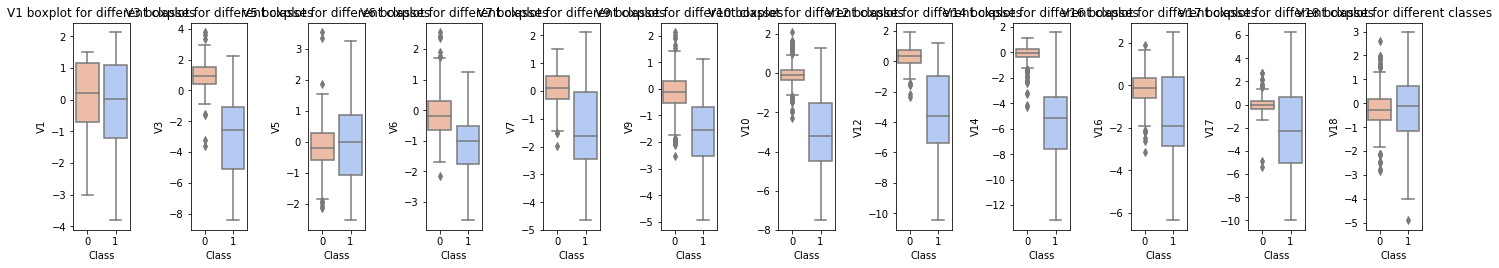

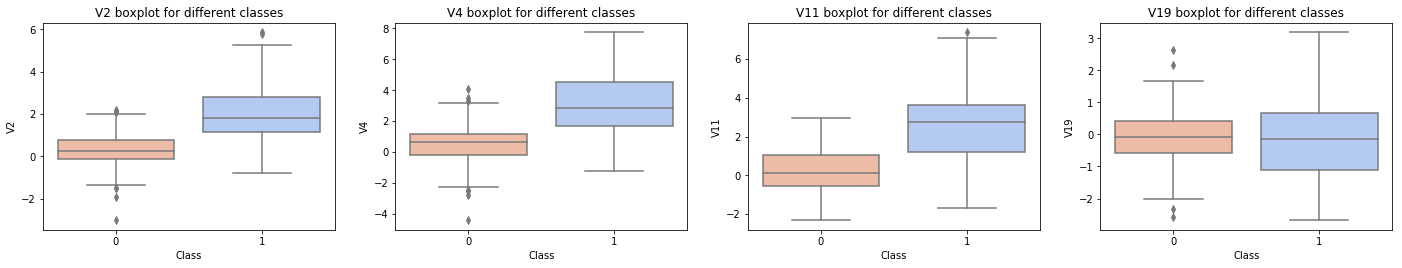

In [24]:
box_plot(negative_corr,outlier_removed)
box_plot(positive_corr,outlier_removed)

In [25]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches

<h1> Dimensionality Reduction </h1>

In [26]:
X = outlier_removed.drop('Class',axis=1)
Y = outlier_removed.Class

In [27]:
reduced_tsne = TSNE(n_components=2,random_state=1992).fit_transform(X.values)
reduced_pca = PCA(n_components=2,random_state=1992).fit_transform(X.values)

In [28]:
def plots(data):
    blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
    red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

    plt.figure()
    plt.scatter(data[:,0],data[:,1],c=(Y==1),cmap='coolwarm',label='Fradulant')
    plt.scatter(data[:,0],data[:,1],c=(Y==0),cmap='coolwarm',label='Non - Fradulant')

    plt.grid(True)
    plt.legend(handles=[red_patch,blue_patch])

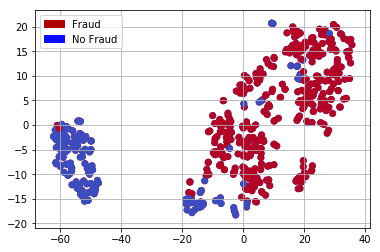

In [29]:
plots(reduced_tsne)

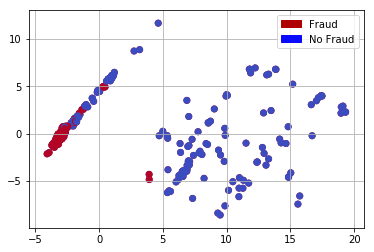

In [30]:
plots(reduced_pca)

<h1> Data Modeling and Evaluation </h1>

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [6]:
classifiers = {
    'Logistic Regressions':LogisticRegression(),
    'Support Vector':SVC(),
    'K Nearest':KNeighborsClassifier(n_neighbors=4),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [7]:
from sklearn.model_selection import cross_val_score, train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [35]:
performance = dict()

In [36]:
for name, classifier in classifiers.items():
   performance[name] = cross_val_score(classifier,X_train,y_train,cv=5)
   print(f'classifier: {classifier.__class__.__name__} has an accuracy of {(performance[name].mean())*100}%')

classifier: LogisticRegression has an accuracy of 96.95485636114911%
classifier: SVC has an accuracy of 95.55129958960326%
classifier: KNeighborsClassifier has an accuracy of 94.14774281805745%
classifier: DecisionTreeClassifier has an accuracy of 99.76470588235294%


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit, learning_curve


In [9]:
def plot_learning_curve(classifiers,X,y,cv):
    fig, ax = plt.subplots(4,sharex=True,figsize=(10,30))
    cls = list(classifiers)
    for i in range(len(cls)):
        train_sizes,train_scores, test_scores = learning_curve(classifiers[cls[i]],X,y,cv=cv)
        train_scores_mean = train_scores.mean(axis=1)
        train_scores_std = train_scores.std(axis=1)
        test_scores_mean = test_scores.mean(axis=1)
        test_scores_std = test_scores.std(axis=1)
        ax[i].plot(train_sizes,train_scores_mean,'o-',color='#ff9124',label='Training score')
        ax[i].plot(train_sizes,test_scores_mean,'o-',color='#2492ff',label='Test score')
        ax[i].fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
        ax[i].fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
        ax[i].set_title(f'{cls[i]} Leaning curve')
        ax[i].set_xlabel('Training size (m)')
        ax[i].set_ylabel('Score')
        ax[i].grid(True)
        ax[i].legend(loc="best")


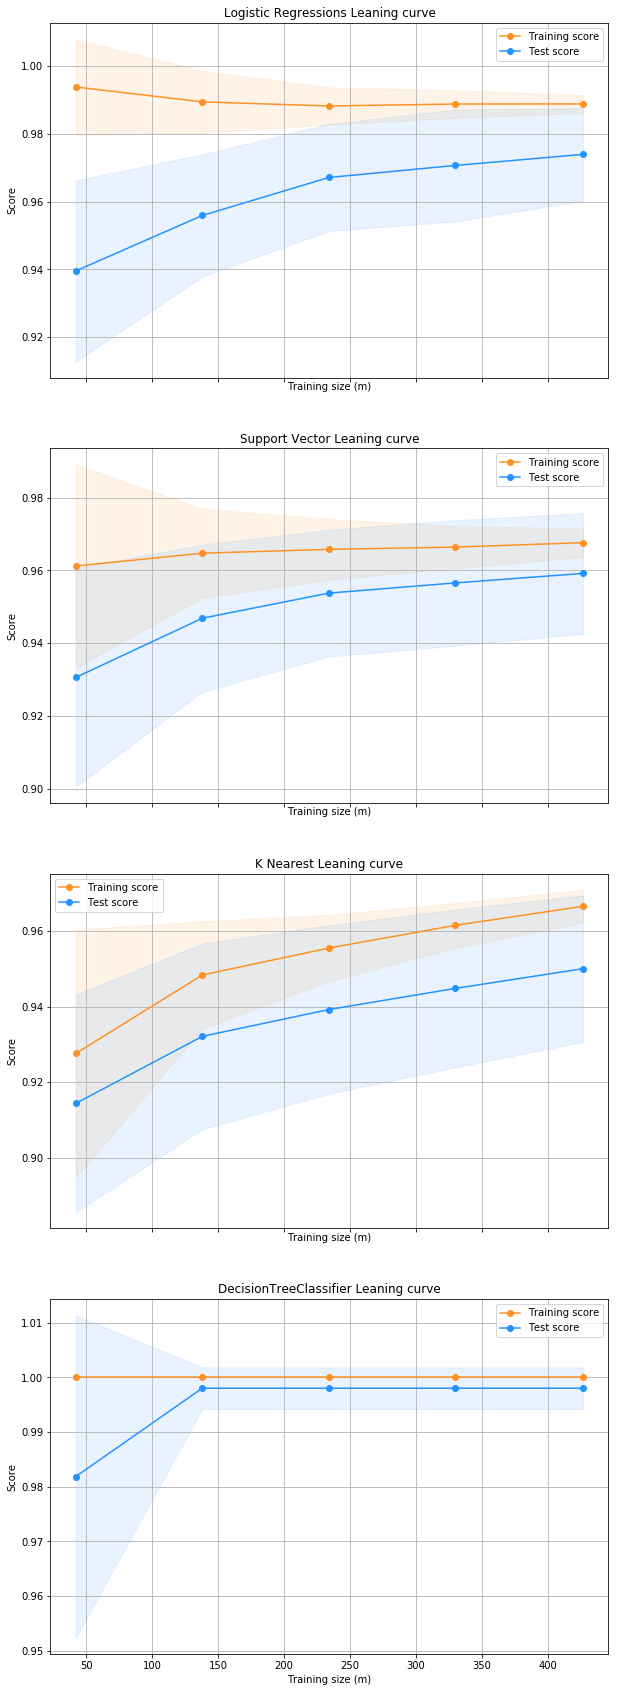

In [39]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(classifiers,X=X.values,y=Y.values,cv=cv)


In [40]:
log_model = LogisticRegression(max_iter=200)
svm = SVC()
neighbors = KNeighborsClassifier(n_neighbors=4)
tree = DecisionTreeClassifier()

In [41]:
log_model.fit(X_train,y_train)
y = log_model.predict(data.drop('Class',axis=1))
print(accuracy_score(y,data.Class))

0.4776497768664394


<h2>The poor accuracy score of the model on the actual unsampled data is an indication that the model has high variance/overfiting.</h2>

In [42]:
data.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class', 'Scaled Time',
       'Scaled Amount'],
      dtype='object')

In [10]:
og_data = data.drop('Class',axis=1)
og_labels = data.Class

In [11]:
data_X = og_data.values
data_y = og_labels.values


In [12]:
from collections import Counter

In [46]:
undersample = NearMiss(version=1,n_neighbors=3)
sampled_x, sampled_y = undersample.fit_sample(og_data,og_labels)
print(f"Near miss label distribution {Counter(sampled_y)}")

Near miss label distribution Counter({0: 492, 1: 492})


In [47]:
def under_sampling_techniques(data,labels,model):
 for train,test in sss.split(data,labels):
   precision = []
   accuracy = []
   f1 = []
   auc = []
   pipeline = imbalanced_pipeline(NearMiss(version=1,sampling_strategy='majority'),model)
   model = pipeline.fit(data[train],labels[train])
   prediction = model.predict(data[test])
   #accuracy.append(pipeline.score(prediction,labels[test].reshape(-1,1)))
   precision.append(precision_score(prediction,labels[test].reshape(-1,1)))
   f1.append(f1_score(prediction,labels[test].reshape(-1,1)))
   auc.append(roc_auc_score(prediction,labels[test].reshape(-1,1)))
   print(f"Precision score: {np.mean(precision)}\nF1 score:{np.mean(f1)}\nAUC score:{np.mean(auc)}")

In [48]:
under_sampling_techniques(data_X,data_y,tree)

Precision score: 0.9795918367346939
F1 score:0.004911490842116033
AUC score:0.5011753041121335
Precision score: 1.0
F1 score:0.0043961959447335365
AUC score:0.5011014701254327
Precision score: 0.9387755102040817
F1 score:0.004033141905221165
AUC score:0.5007481724071798
Precision score: 0.9183673469387755
F1 score:0.0045069858280334515
AUC score:0.5008959005042479
Precision score: 0.9387755102040817
F1 score:0.0041009182490862085
AUC score:0.5007814107626205
Precision score: 0.8979591836734694
F1 score:0.004025801729264834
AUC score:0.500633955191849
Precision score: 1.0
F1 score:0.003996411385694478
AUC score:0.5010011032566501
Precision score: 1.0
F1 score:0.003735467886411282
AUC score:0.5009356144504697
Precision score: 0.9795918367346939
F1 score:0.004512126339537507
AUC score:0.5010617080230947
Precision score: 0.9591836734693877
F1 score:0.004656923458013377
AUC score:0.5010472317301666


<h1> Oversampling</h1><p><h2>Synthetic Minority Oversampling Technique:</h2></br>

In [13]:
from sklearn.model_selection import RandomizedSearchCV
import time

In [14]:
def smoting_classifiers(X,y,classifier,**params):
    random_grid = RandomizedSearchCV(classifier,params,n_iter=2)
    accuracy = []
    f1 = []
    recall = []
    precision = []
    past = time.time()
    for train,test in sss.split(X,y):
        pipeline = imbalanced_pipeline(SMOTE(sampling_strategy='minority'),random_grid)
        model = pipeline.fit(X[train],y[train])
        predict = model.predict(X[test])
        accuracy.append(accuracy_score(predict,y[test]))
        f1.append(f1_score(predict,y[test]))
        recall.append(recall_score(predict,y[test]))
        precision.append(precision_score(predict,y[test]))
    print(f'Overall time elapsed {time.time()-past}')
    
    print(f"{classifier.__class__._name__}|\t|{np.mean(accuracy)}|\t|{np.mean(f1_score)}|\t|{np.mean(recall)}|\t|{np.mean(precision)}|\n")
    print('-'*45)
    print('\n')


In [15]:
smote_classifiers={
SVC():{'kernel':['rbf'],'C':[0.01]},
KNeighborsClassifier():{'n_neighbors':[3,4,5]},
DecisionTreeClassifier():{'criterion':['gini','entropy']}}

In [ ]:
print("Classifier:|\t|Accuracy|\t|F1 score|\t|Recall|\t|Precision|\t")
for classifier, params in smote_classifiers.items():
 smoting_classifiers(data_X,data_y,classifier,**params)
 

Classifier:|	|Accuracy|	|F1 score|	|Recall|	|Precision|	


D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 1 is smaller than n_iter=2. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
